In [1]:
from tinyarray import array as ta
import numpy as np
from numpy import kron, exp, linalg, sqrt, sin, cos, pi
from copy import copy

# Pauli matrices
sigma0 = ta([[1, 0], [0, 1]])
sigma1 = ta([[0, 1], [1, 0]])
sigma2 = ta([[0, -1j], [1j, 0]])
sigma3 = ta([[1, 0], [0, -1]])

# products of Pauli matrices
s0s0 = kron( sigma0,sigma0 )
s0s1 = kron( sigma0,sigma1 )
s0s2 = kron( sigma0,sigma2 )
s0s3 = kron( sigma0,sigma3 )

s1s0 = kron( sigma1,sigma0 )
s1s1 = kron( sigma1,sigma1 )
s1s2 = kron( sigma1,sigma2 )
s1s3 = kron( sigma1,sigma3 )

s2s0 = kron( sigma2,sigma0 )
s2s1 = kron( sigma2,sigma1 )
s2s2 = kron( sigma2,sigma2 )
s2s3 = kron( sigma2,sigma3 )

s3s0 = kron( sigma3,sigma0 )
s3s1 = kron( sigma3,sigma1 )
s3s2 = kron( sigma3,sigma2 )
s3s3 = kron( sigma3,sigma3 )

In [5]:
def Hamiltonian(px, py, pz, Parameters):
    p = copy(Parameters)
#It is the Hamiltonian that is written in Baireuther et al.'16
    return p.tp*(sin(px)*s3s1 + sin(py)*s3s2) + p.tzp*sin(pz)*s2s0 \
+ ( p.M0+p.t*(2-cos(px)-cos(py))+p.tz*(1-cos(pz)) )*s1s0 \
+ p.b0/2.*s2s3 + p.betaz/2.*s0s3
#And below is the Hamiltonian implemented in the code that was given to Artem by Paul on 28-Nov'16
#Which actually (somehow) seems to give the same spectrum.
#     return p.tp*(sin(px)*s3s1 + sin(py)*s3s2) + p.tzp*sin(pz)*s3s3 \
#     + ( p.M0+p.t*(2-cos(px)-cos(py))+p.tz*(1-cos(pz)) )*s1s0 \
#     + p.b0/2.*s3s0 + p.betaz/2.*s0s3

    

def EigenEnergies(pxArray, pzArray, py, EnergyBand, Parameters):
    EigenEnergiesArray = []
    i = -1
    for px in pxArray:
        EigenEnergiesArray.append([])
        i = i+1
        for pz in pzArray:
            EnergySpectrum = linalg.eigvalsh(Hamiltonian(px, py, pz, Parameters))
            EigenEnergiesArray[i].append(EnergySpectrum[EnergyBand])
           
    return EigenEnergiesArray



class SimpleNamespace(object):
    """A simple container for parameters."""
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

        
        
Parameters = SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, betaz=1.2, b0=0.2 )

## We have four bands in total

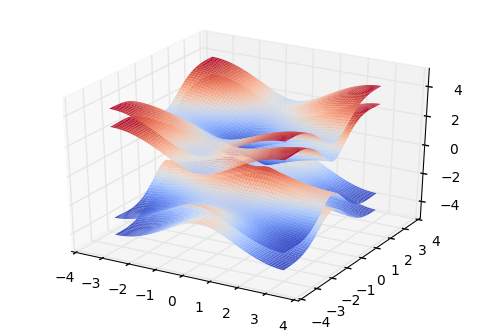

In [3]:
py = 0.

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-pi, pi, 0.1)
Z = np.arange(-pi, pi, 0.1)
pX, pZ = np.meshgrid(X, Z)
ax.plot_surface(pX, pZ, EigenEnergies(X,Z,py,0,Parameters), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.plot_surface(pX, pZ, EigenEnergies(X,Z,py,1,Parameters), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.plot_surface(pX, pZ, EigenEnergies(X,Z,py,2,Parameters), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.plot_surface(pX, pZ, EigenEnergies(X,Z,py,3,Parameters), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)

plt.show()
del fig, ax, X, Z, pX, pZ, py

## The band touching happens around $p^z = \pm \beta_z / 2$

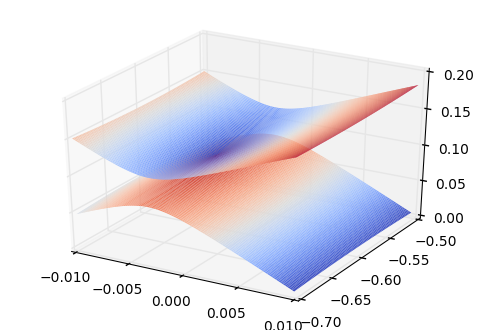

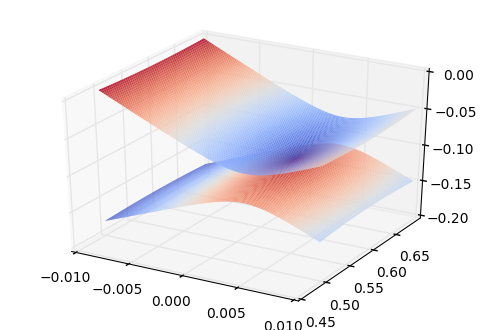

In [4]:
py = 0.

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-0.01, 0.01, 0.01/50.)
Z = np.arange( -Parameters.betaz/2 - 0.1, -Parameters.betaz/2 + 0.1, 0.1/50. + 10**(-5))

pX, pZ = np.meshgrid(X, Z)
ax.plot_surface(pX, pZ, EigenEnergies(X,Z,py,1,Parameters), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.plot_surface(pX, pZ, EigenEnergies(X,Z,py,2,Parameters), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
plt.show()


fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-0.01, 0.01, 0.01/50.)
Z = np.arange( Parameters.betaz/2 - 0.1, Parameters.betaz/2 + 0.1, 0.1/50. + 10**(-5))

pX, pZ = np.meshgrid(X, Z)
ax.plot_surface(pX, pZ, EigenEnergies(X,Z,py,1,Parameters), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
ax.plot_surface(pX, pZ, EigenEnergies(X,Z,py,2,Parameters), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
plt.show()


del fig, ax, X, Z, pX, pZ

## More precise determination of the Weyl-node parameters (so far it is made by hand)

In [6]:
py = 0.
px = 0.
pz = -0.63110
EnergySpectrum = linalg.eigvalsh(Hamiltonian(px,py,pz,Parameters))
print('The energy of the Weyl node at p_z =', pz, 'is ', EnergySpectrum[1])
print('The energy splitting of the bands at this p_z is', EnergySpectrum[1]-EnergySpectrum[2])


py = 0.
px = 0.01
pz = -0.63110
EnergySpectrum = linalg.eigvalsh(Hamiltonian(px,py,pz,Parameters))
VelocityX = (EnergySpectrum[1]-EnergySpectrum[2]) / 2. / px
print('The velocity along x is', VelocityX)


py = 0.01
px = 0.
pz = -0.63110
EnergySpectrum = linalg.eigvalsh(Hamiltonian(px,py,pz,Parameters))
VelocityY = (EnergySpectrum[1]-EnergySpectrum[2]) / 2. / py
print('The velocity along y is', VelocityY)


px = 0.
py = 0.
deltapz = 0.01
pz = -0.63110 + deltapz
EnergySpectrum = linalg.eigvalsh(Hamiltonian(px,py,pz,Parameters))
VelocityZ = (EnergySpectrum[1]-EnergySpectrum[2]) / 2. / deltapz
print('The velocity along z is', VelocityZ)


del px, py, pz, Hamiltonian, EnergySpectrum, VelocityX, VelocityZ

The energy of the Weyl node at p_z = -0.6311 is  0.0983380999376
The energy splitting of the bands at this p_z is -1.84665121004e-06
The velocity along x is -1.99902715516
The velocity along y is -1.99902715516
The velocity along z is -0.683833476976
